In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn tensorflow keras cartopy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install kaggle

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Data Import

### We need to use Kaggle's API to download the data since it's too big to be uploaded to GitHub

In [3]:
%pip install kagglehub


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("usdot/flight-delays")

print("Path to dataset files:", path)

c:\Users\sukhm\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\sukhm\.cache\kagglehub\datasets\usdot\flight-delays\versions\1


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [6]:
import tensorflow as tf
from tensorflow import keras
# could be cool to do sometype of simple NN 

In [7]:
df = pd.read_csv(path + "/flights.csv")
airports = pd.read_csv(path + "/airports.csv")

C:\Users\sukhm\AppData\Local\Temp\ipykernel_29504\1086104120.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path + "/flights.csv")


had warning for code above "C:\Users\sukhm\AppData\Local\Temp\ipykernel_35620\1086104120.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path + "/flights.csv")
"

In [8]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# for day of the week, 1 is Monday, 7 is Sunday
# we don't want any model to mistake the day of the week as numeric data
df['DAY_OF_WEEK'] = df['DAY_OF_WEEK'].map({ 1: 'M',
                                            2: 'Tu',
                                            3: 'W',
                                            4: 'Th',
                                            5: 'F',
                                            6: 'Sa',
                                            7: 'Su'})

In [10]:
df.DEPARTURE_DELAY = df.DEPARTURE_DELAY.dropna() # drop NaN
df.ARRIVAL_DELAY = df.ARRIVAL_DELAY.dropna() # drop NaN

In [11]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,Th,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,Th,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,Th,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,Th,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,Th,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### We need to decide how long the departure/arrival delay needs to be to classify as a significant delay

This is just my data exploration

In [12]:
df.DEPARTURE_DELAY.describe(), df.ARRIVAL_DELAY.describe()

(count    5.732926e+06
 mean     9.370158e+00
 std      3.708094e+01
 min     -8.200000e+01
 25%     -5.000000e+00
 50%     -2.000000e+00
 75%      7.000000e+00
 max      1.988000e+03
 Name: DEPARTURE_DELAY, dtype: float64,
 count    5.714008e+06
 mean     4.407057e+00
 std      3.927130e+01
 min     -8.700000e+01
 25%     -1.300000e+01
 50%     -5.000000e+00
 75%      8.000000e+00
 max      1.971000e+03
 Name: ARRIVAL_DELAY, dtype: float64)

In [13]:
df.DEPARTURE_DELAY.value_counts().sort_index()

DEPARTURE_DELAY
-82.0      1
-68.0      1
-61.0      1
-56.0      1
-55.0      1
          ..
 1631.0    1
 1649.0    1
 1670.0    1
 1878.0    1
 1988.0    1
Name: count, Length: 1217, dtype: int64

In [14]:
df.ARRIVAL_DELAY.value_counts().sort_index()

ARRIVAL_DELAY
-87.0      2
-82.0      1
-81.0      2
-80.0      3
-79.0      2
          ..
 1636.0    2
 1638.0    1
 1665.0    1
 1898.0    1
 1971.0    1
Name: count, Length: 1240, dtype: int64

In [15]:
len(df.columns)

31

In [16]:
# We need to do some data exploration for the columns that we want to use
# we'll definitely need to drop some columns and rows
# we'll also need to figure out which airports we want to keep because it'd be too much to encode all of them

## Plot airports on a map and maybe cluster based on geographic location

In [17]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


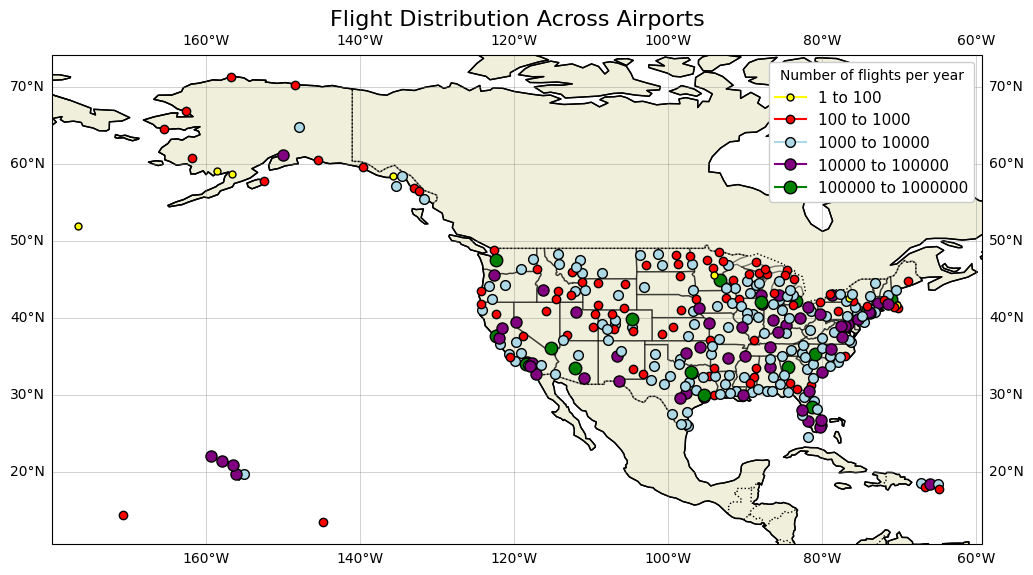

In [18]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from collections import OrderedDict

# Define properties of markers and labels
count_flights = df['ORIGIN_AIRPORT'].value_counts()
colors = ['yellow', 'red', 'lightblue', 'purple', 'green', 'orange']
size_limits = [1, 100, 1000, 10000, 100000, 1000000]
labels = []

for i in range(len(size_limits)-1):
    labels.append(f"{size_limits[i]} to {size_limits[i+1]}")

# Create a figure with a geographic projection
plt.figure(figsize=(12, 12))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add features to the map
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle='-', alpha=0.5)

ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)

# Plot airports on the map
for index, (code, y, x) in airports[['IATA_CODE', 'LATITUDE', 'LONGITUDE']].iterrows():
    isize = [i for i, val in enumerate(size_limits) if val < count_flights.get(code, 0)]
    if isize:  # Check if the airport has flight counts within defined limits
        ind = isize[-1]
        ax.plot(x, y, marker='o', markersize=ind+5, markeredgewidth=1, 
                color=colors[ind], markeredgecolor='k', 
                transform=ccrs.PlateCarree(), label=labels[ind])


handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
key_order = ('1 to 100', '100 to 1000', '1000 to 10000',
             '10000 to 100000', '100000 to 1000000')
new_label = OrderedDict()
for key in key_order:
    if key in by_label:
        new_label[key] = by_label[key]

# Add a legend
plt.legend(new_label.values(), new_label.keys(), loc='upper right', prop={'size':11},
           title='Number of flights per year', frameon=True, framealpha=1)

# Show the map
plt.title("Flight Distribution Across Airports", fontsize=16)
plt.show()

### temporary airport location grouping by west coast, midwest, east coast, south

### will need prof advice how to do this better


In [19]:
#joining on origin airport
df = df.join(airports.set_index('IATA_CODE'), on='ORIGIN_AIRPORT', how='inner')


In [20]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,2015,1,1,Th,AS,98,N407AS,ANC,SEA,5,...,NaN,NaN,NaN,NaN,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
1,2015,1,1,Th,AA,2336,N3KUAA,LAX,PBI,10,...,NaN,NaN,NaN,NaN,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
2,2015,1,1,Th,US,840,N171US,SFO,CLT,20,...,NaN,NaN,NaN,NaN,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484
3,2015,1,1,Th,AA,258,N3HYAA,LAX,MIA,20,...,NaN,NaN,NaN,NaN,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
4,2015,1,1,Th,AS,135,N527AS,SEA,ANC,25,...,NaN,NaN,NaN,NaN,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931


In [21]:
def group_states(row):
    if row in ['CA', 'WA', 'OR', 'AK', 'HI', 'AZ', 'NV', 'UT', 'ID', 'MT', 'WY', 'CO', 'NM']:
        return 'west'
    elif row in ['ND', 'SD', 'NE', 'KS', 'MN', 'IA', 'MO', 'WI', 'IL', 'IN', 'MI', 'OH']:
        return 'midwest'
    elif row in ['TX', 'OK', 'AR', 'LA', 'MS', 'AL', 'GA', 'FL', 'SC', 'NC', 'TN', 'KY']:
        return 'south'
    elif row in ['PA', 'NY', 'NJ', 'CT', 'RI', 'MA', 'NH', 'VT', 'ME', 'DE', 'MD', 'VA', 'WV', 'DC']:
        return 'east'
    else:
        return 'Other'

In [22]:
# group origin airport states into regions
df['OA_grouped'] = df['STATE'].map(group_states)

In [23]:
#remove join on airports and origin airport
df.drop(['AIRPORT', 'CITY','STATE', 'COUNTRY', 'LATITUDE', "LONGITUDE"], axis=1, inplace=True)

In [24]:
#now join on destination airport
df = df.join(airports.set_index('IATA_CODE'), on='DESTINATION_AIRPORT', how='inner')

In [25]:
# map destination airport states into regions
df['DA_grouped'] = df['STATE'].map(group_states)

In [26]:
# remove airport information since we don't need it anymore
df.drop(['AIRPORT', 'CITY','STATE', 'COUNTRY', 'LATITUDE', "LONGITUDE"], axis=1, inplace=True)

In [27]:
# now we have grouped airport regions so one hot encoding them will be much easier
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,OA_grouped,DA_grouped
0,2015,1,1,Th,AS,98,N407AS,ANC,SEA,5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,west,west
1,2015,1,1,Th,AA,2336,N3KUAA,LAX,PBI,10,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,west,south
2,2015,1,1,Th,US,840,N171US,SFO,CLT,20,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,west,south
3,2015,1,1,Th,AA,258,N3HYAA,LAX,MIA,20,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,west,south
4,2015,1,1,Th,AS,135,N527AS,SEA,ANC,25,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,west,west


## View correlation and linearity between features

## Create a model and figure out the feature encoding

In [28]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'OA_grouped', 'DA_grouped'],
      dtype='object')

In [29]:
# We may want to use tail number as a feature, but there are too many unique values, find a way to group these
df.TAIL_NUMBER.value_counts()

TAIL_NUMBER
N480HA    3446
N488HA    3390
N484HA    3343
N493HA    3295
N478HA    3237
          ... 
N7LEAA       1
N7LBAA       1
N840MH       1
N180UA       1
N121UA       1
Name: count, Length: 4896, dtype: int64

In [30]:
features = ['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'OA_grouped', 'DA_grouped', 'SCHEDULED_DEPARTURE']

In [31]:
df['target'] = (
    (df['ARRIVAL_DELAY'] > 10) |
    (df['DEPARTURE_DELAY'] > 10) |
    (df['CANCELLED'] == 1) |
    (df['DIVERTED'] == 1) |
    (df['AIR_SYSTEM_DELAY'] > 10) |
    (df['SECURITY_DELAY'] > 10) |
    (df['AIRLINE_DELAY'] > 10) |
    (df['LATE_AIRCRAFT_DELAY'] > 10) |
    (df['WEATHER_DELAY'] > 10)
)


In [32]:
# The target variable classes are unbalanced since there are double the amount of 0s than 1s
df.target.value_counts()

target
False    3792169
True     1540745
Name: count, dtype: int64

In [33]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.tree import DecisionTreeClassifier

# tree = DecisionTreeClassifier()

# # one hot encode the categorical variables
# ohe = OneHotEncoder()
# features_ohe = ohe.fit_transform(df[features].astype(str))

# # split the data
# X_train, X_test, y_train, y_test = train_test_split(features_ohe, df['target'], test_size=0.2, random_state=42)

# # fit the model
# tree.fit(X_train, y_train)


In [34]:
# tree.score(X_train, y_train), tree.score(X_test, y_test)

In [35]:
#from sklearn.metrics import precision_score, confusion_matrix, recall_score, accuracy_score
#confusion_matrix(y_test, tree.predict(X_test)), precision_score(y_test, tree.predict(X_test)), recall_score(y_test, tree.predict(X_test)), accuracy_score(y_test, tree.predict(X_test))

very high train accuracy and lower test accuracy, high variance and lowish bias, suggesting the model is overfit

need to consider different data scaling techniques, such as one hot encoding for airlines and airports but a different method for month day and day of the week since they're not quite categorical or continuous 

## Dataset Visualization and Correlation Analysis


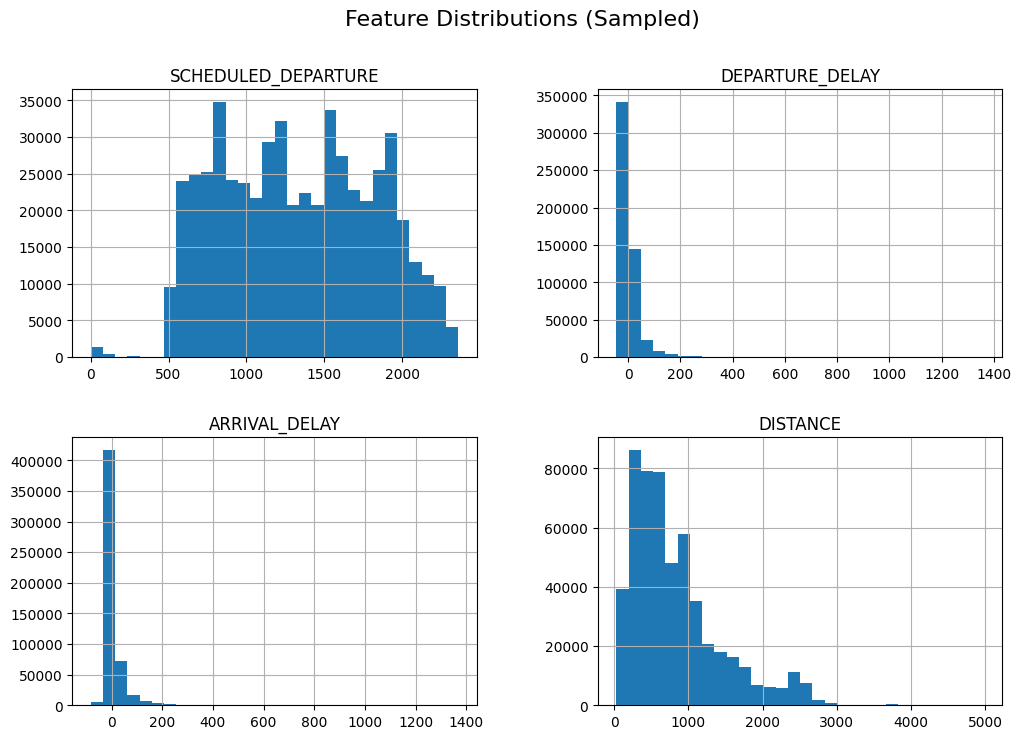

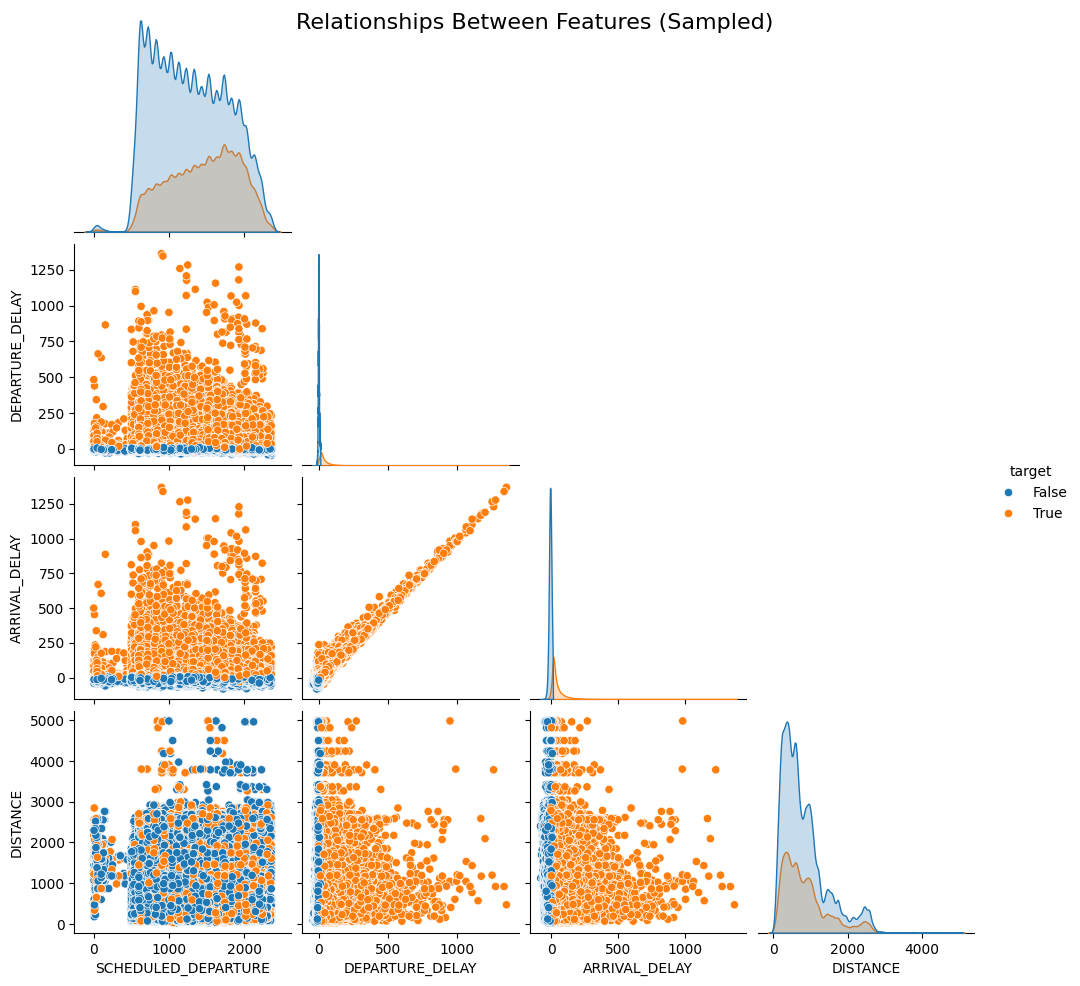

Correlation Matrix (Sampled):
                     SCHEDULED_DEPARTURE  DEPARTURE_DELAY  ARRIVAL_DELAY  \
SCHEDULED_DEPARTURE             1.000000         0.112604       0.102694   
DEPARTURE_DELAY                 0.112604         1.000000       0.945211   
ARRIVAL_DELAY                   0.102694         0.945211       1.000000   
DISTANCE                       -0.008575         0.025940      -0.023759   
target                          0.159977         0.542010       0.593895   

                     DISTANCE    target  
SCHEDULED_DEPARTURE -0.008575  0.159977  
DEPARTURE_DELAY      0.025940  0.542010  
ARRIVAL_DELAY       -0.023759  0.593895  
DISTANCE             1.000000  0.033157  
target               0.033157  1.000000  


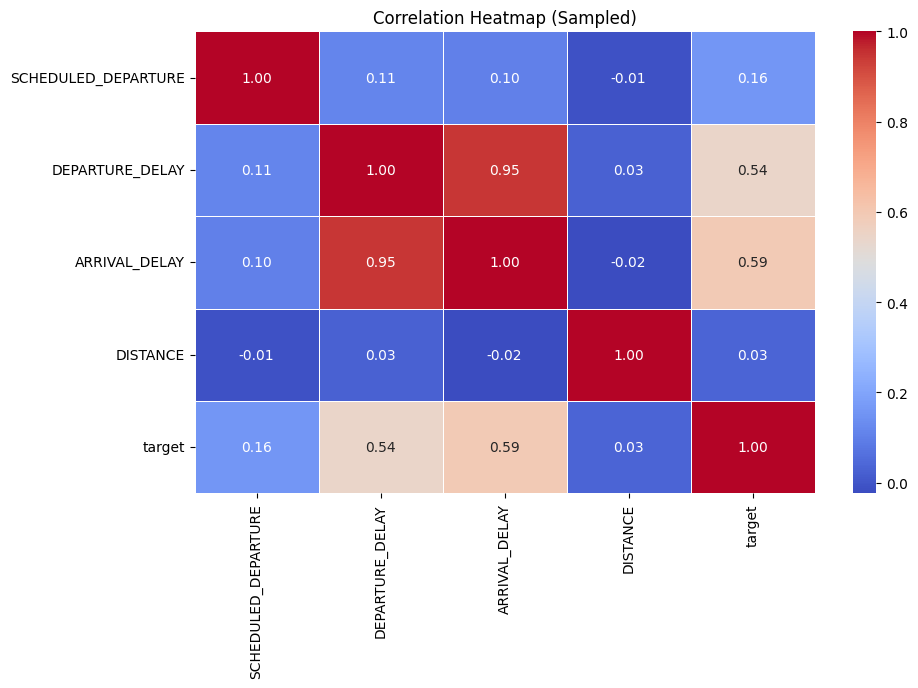

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sampling 10% of the data for demonstration purposes
df_sampled = df.sample(frac=0.1, random_state=42)  # Random seed ensures consistent results

# Plot the distributions of numeric features
numeric_features = ['SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'DISTANCE']
df_sampled[numeric_features].hist(bins=30, figsize=(12, 8))  # Creates histograms for each feature
plt.suptitle('Feature Distributions (Sampled)', fontsize=16)  # Add a title to the plot
plt.show()

# Sscatter plot matrix to visualize relationships between features
sns.pairplot(df_sampled, vars=numeric_features, hue='target', diag_kind='kde', corner=True)
plt.suptitle('Relationships Between Features (Sampled)', fontsize=16)  # Add a title to the scatter plot matrix
plt.show()

# Compute the correlation matrix for numeric features
correlation_matrix = df_sampled[numeric_features + ['target']].corr() 
print("Correlation Matrix (Sampled):")
print(correlation_matrix)  #correlation values for reference

# correlation matrix as a heatmap

plt.figure(figsize=(10, 6))  # Set the figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)  
plt.title('Correlation Heatmap (Sampled)') 
plt.show()



##interpretation

-EDA (Exploratory Data Analysis)
1. Feature Distributions: The histograms show that most flights experience minimal or no delays, but there are significant outliers with extreme delays. Departure and arrival delays are heavily right-skewed, while distance exhibits a bimodal distribution, likely representing short-haul and long-haul flights. These patterns highlight the need to account for outliers and potential skewness during model training.
    
- Plotted Features to See if Linear or Non-linear
2. Feature Relationships: The scatter plot matrix reveals a strong linear relationship between departure and arrival delays, confirming that delays at the start of a flight often propagate to the end. Other features, like distance, show little correlation with delays. Color coding for the target variable indicates that delayed flights (target = True) cluster in regions with higher departure and arrival delays.
    

-Correlation Analysis
3. Correlation Analysis: The heatmap confirms a strong positive correlation (0.95) between departure and arrival delays, making these features key predictors for the model. A moderate correlation (0.54) exists between departure delays and the target variable, while features like distance and scheduled departure times show weak correlations with delays. This analysis helps prioritize features for inclusion in the model.
   